
# Tarea 1 - Toma de Decisiones Basada en Datos

# Profesor : Marcelo Olivares

## Integrantes

* Claudia Torres: 18.015.624-0
* Juan Ernesto Sepulveda: 9.672.197-8
* Matías Cifuentes: 18.176.668-9
* Felipe del Río: 21.296.000-4


## Pregunta 1

### Preparamos los datos para hacer un primer análisis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm # para calcular la razón con datos de la distribución

In [ ]:
# ruta de su archivo CSV
ns_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datos/T1_Olivares_2023/caso_noshow_Assignment.csv", sep=";", on_bad_lines='skip', encoding='latin1',doublequote=False, skipinitialspace=True)

In [ ]:
ns_df

,id,ruta,fecha,vuelo,dia_sem,sem_anio,asientos,pasajeros,hora_despegue,origen,destino,pasajero_conexion,pasajero_negocio,pasajeros_ns
0,1,LIMA - SAO PAULO,20/03/2016,2417,7,12,174,136,19:00:00,SAO,LIM,101,4,3
1,2,LIMA - SAO PAULO,13/03/2016,2417,7,11,126,128,19:00:00,SAO,LIM,124,15,0
2,3,LIMA - SAO PAULO,06/03/2016,2417,7,10,126,123,19:00:00,SAO,LIM,93,10,2
3,4,LIMA - SAO PAULO,26/03/2016,2417,6,13,126,105,19:00:00,SAO,LIM,80,4,5
4,5,LIMA - SAO PAULO,19/03/2016,2417,6,12,126,120,19:00:00,SAO,LIM,107,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,2790,LIMA - SAO PAULO,05/12/2017,2608,2,49,150,108,8:29:00,LIM,SAO,12,5,6
2790,2791,LIMA - SAO PAULO,25/12/2017,2608,1,52,168,153,8:29:00,LIM,SAO,138,11,1
2791,2792,LIMA - SAO PAULO,18/12/2017,2608,1,51,174,142,8:29:00,LIM,SAO,112,11,10
2792,2793,LIMA - SAO PAULO,11/12/2017,2608,1,50,174,124,8:29:00,LIM,SAO,85,4,16


In [ ]:
# Creando una nueva variable.
ns_df['ns_pp'] = ns_df['pasajeros_ns'] / ns_df['pasajeros']


In [ ]:
#Preparar las variables para análisis

# Aplicar las transformaciones
ns_df['fecha'] = pd.to_datetime(ns_df['fecha'], format='%d/%m/%Y')
ns_df['año'] = ns_df['fecha'].dt.year
ns_df['mes'] = ns_df['fecha'].dt.month
ns_df['dia_semana'] = ns_df['fecha'].dt.dayofweek

# Mapeo de días de la semana y meses en español
dias_semana = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
mes = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
            7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

ns_df['nombre_dia'] = ns_df['fecha'].dt.dayofweek.map(dias_semana)
ns_df['nombre_mes'] = ns_df['fecha'].dt.month.map(mes)

In [ ]:
## convertir hora

# Paso 1: Convertir 'hora_despegue' a un número entero que represente la hora
ns_df['hora_despegue'] = pd.to_datetime(ns_df['hora_despegue'], format='%H:%M:%S').dt.hour

# Paso 2: Crear un DataFrame con todas las horas del día (0 a 23)
all_hours = pd.DataFrame({'hora_despegue': range(24)})

# Unir el DataFrame de todas las horas con ns_df para incluir las horas faltantes
ns_df_full_hours = pd.merge(all_hours, ns_df, on='hora_despegue', how='left')

# Verificar si la unión se ha realizado correctamente
sample_data = ns_df_full_hours.sample(5)  # Muestra aleatoria para verificar
sample_data

,hora_despegue,id,ruta,fecha,vuelo,dia_sem,sem_anio,asientos,pasajeros,origen,destino,pasajero_conexion,pasajero_negocio,pasajeros_ns,ns_pp,año,mes,dia_semana,nombre_dia,nombre_mes
1007,12,521.0,LIMA - SAO PAULO,2016-04-24,2554.0,7.0,17.0,150.0,154.0,LIM,SAO,101.0,10.0,1.0,0.006494,2016.0,4.0,6.0,Domingo,Abril
967,12,387.0,LIMA - SAO PAULO,2016-08-16,607.0,2.0,34.0,150.0,145.0,SAO,LIM,93.0,3.0,12.0,0.082759,2016.0,8.0,1.0,Martes,Agosto
899,12,251.0,LIMA - SAO PAULO,2016-08-04,2554.0,4.0,32.0,150.0,134.0,LIM,SAO,116.0,6.0,7.0,0.052239,2016.0,8.0,3.0,Jueves,Agosto
523,8,1746.0,LIMA - SAO PAULO,2017-06-01,2608.0,4.0,22.0,150.0,104.0,LIM,SAO,83.0,2.0,32.0,0.307692,2017.0,6.0,3.0,Jueves,Junio
425,8,1376.0,LIMA - SAO PAULO,2016-10-29,2608.0,6.0,44.0,150.0,92.0,LIM,SAO,63.0,6.0,7.0,0.076087,2016.0,10.0,5.0,Sábado,Octubre


### Parte a.- Comenzaremos haciendo un análisis por hora de despegue

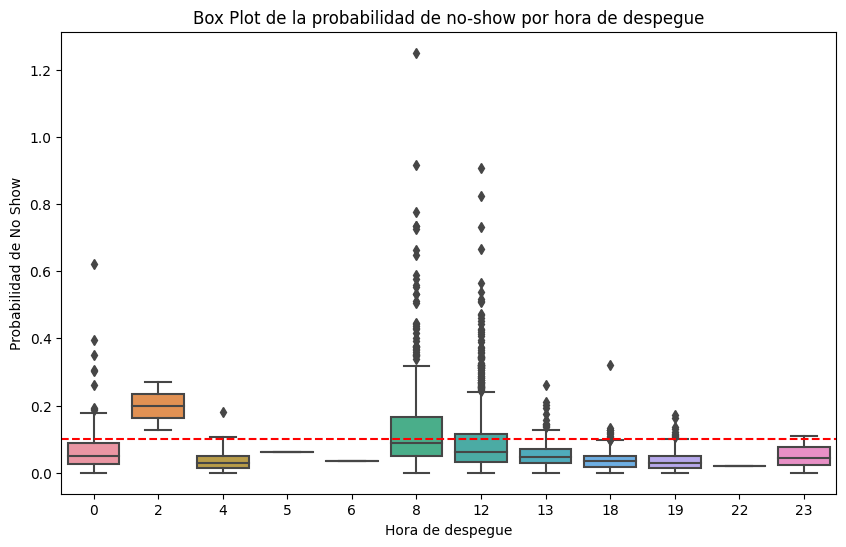

In [ ]:
# Crear el boxplot hora de despegue
plt.figure(figsize=(10, 6))
sns.boxplot(x='hora_despegue', y='ns_pp', data=ns_df)

# Dibujar una línea punteada roja en y=0.1
plt.axhline(y=0.1, color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('Hora de despegue')
plt.ylabel('Probabilidad de No Show')
plt.title('Box Plot de la probabilidad de no-show por hora de despegue')

# Mostrar el gráfico
plt.show()


En esta primera aproximación, podemos identificar que la mayor probabilidad promedio la presenta las 2 AM, seguido de
8 AM y 12 PM. Estas dos últimas presenta una mayor dispersión con mayor número de observaciones sobre el cuartil 75%.
Para tener más información sobre la hora con mayor probabilidad de no-show, calculamos la probabilidad promedio por
hora, como se muestra en el Cuadro 1.


In [ ]:
# Calcular el promedio de 'ns_pp' agrupado por la hora numérica de 'hora_despegue'
ns_pp_agregado_por_hora_num = ns_df.groupby('hora_despegue')['ns_pp'].mean().reset_index()

# Ordenar el DataFrame por el promedio de 'ns_pp' en orden descendiente
ns_pp_agregado_ordenado_desc = ns_pp_agregado_por_hora_num.sort_values(by='ns_pp', ascending=False)

# Mostrar las primeras filas del DataFrame ordenado en orden descendiente
ns_pp_agregado_ordenado_desc

,hora_despegue,ns_pp
1,2,0.198927
5,8,0.127478
6,12,0.091313
0,0,0.082181
3,5,0.062500
7,13,0.055809
11,23,0.050815
8,18,0.038345
4,6,0.034965
2,4,0.034938



Para el horario de las 2 am, una hipótesis es que es más difícil encontrar taxis
a esa hora o que los pasajeros que no llegan se quedan dormidos. Las 8 AM y las
12 PM son horarios de mayor tráfico vehicular, por lo que aumenta la probabilidad
de tener imprevistos camino al aeropuerto, como también encontrar vehículos
de alquiler disponibles, además de dificultades para estacionar el auto en
el aeropuerto.


### Parte b.-

Además de la hora, el día de la semana y el mes presentan patrones que pueden indicarnos mayor probabilidad de no-show.

*Hipótesis*: los días del final de semana presentan mayor probabilidad de no-show.

Como primera aproximación observamos un BosPlot para ver la distribución de probabilidades en los días de la semana

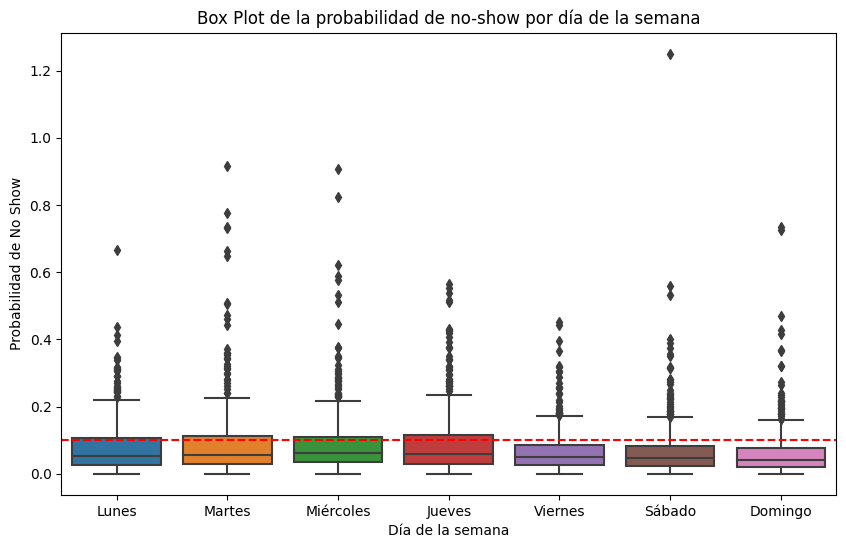

In [ ]:
# Aplicar las transformaciones
ns_df['dia_semana'] = ns_df['fecha'].dt.dayofweek
ns_df['dia_semana_nombre'] = ns_df['dia_semana'].map(dias_semana)

# Orden de los días de la semana para el boxplot
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='dia_semana_nombre', y='ns_pp', data=ns_df, order=orden_dias)

# Dibujar una línea punteada roja en y=0.1
plt.axhline(y=0.1, color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('Día de la semana')
plt.ylabel('Probabilidad de No Show')
plt.title('Box Plot de la probabilidad de no-show por día de la semana')

# Mostrar el gráfico
plt.show()


En una primera aproximación no es claro si existe una mayor probabilidad para un día de la semana. Si se observa que los días con mayor dispersión son el martes y el miércoles. Para poder obtener más información ordenamos las probabilidades promedio en la siguiente tabla.


In [ ]:
# Calcular el promedio de 'ns_pp' agrupado por el día de la semana
ns_pp_agregado_por_dia = ns_df.groupby('dia_semana_nombre')['ns_pp'].mean().reset_index()

# Ordenar el DataFrame por el promedio de 'ns_pp' en orden descendiente
ns_pp_agregado_por_dia_ordenado_desc = ns_pp_agregado_por_dia.sort_values(by='ns_pp', ascending=False)

# Mostrar las primeras filas del DataFrame ordenado en orden descendiente
ns_pp_agregado_por_dia_ordenado_desc

,dia_semana_nombre,ns_pp
3,Martes,0.093789
1,Jueves,0.093722
4,Miércoles,0.093660
2,Lunes,0.080728
5,Sábado,0.071614
6,Viernes,0.069179
0,Domingo,0.062451



Al observar el Cuadro 2 se constata que no existe una diferencia importante por e día de la semana. Más aún, son los días de la semana que presentan una mayor probabilidad de no-show.

Con todo, rechazamos la hipótesis de que los finales de semana se presenta una mayor probabilidad de no-show.

El próximo paso es verificar si los meses de vaciones presenta más no-show que el resto del año.

*Hipótesis*: los meses de vaciones presentan menor probabilidad de no-show.

Como primer paso, visualizamos un gráfico boxplot de la probabilidad de no-show y los meses del año.


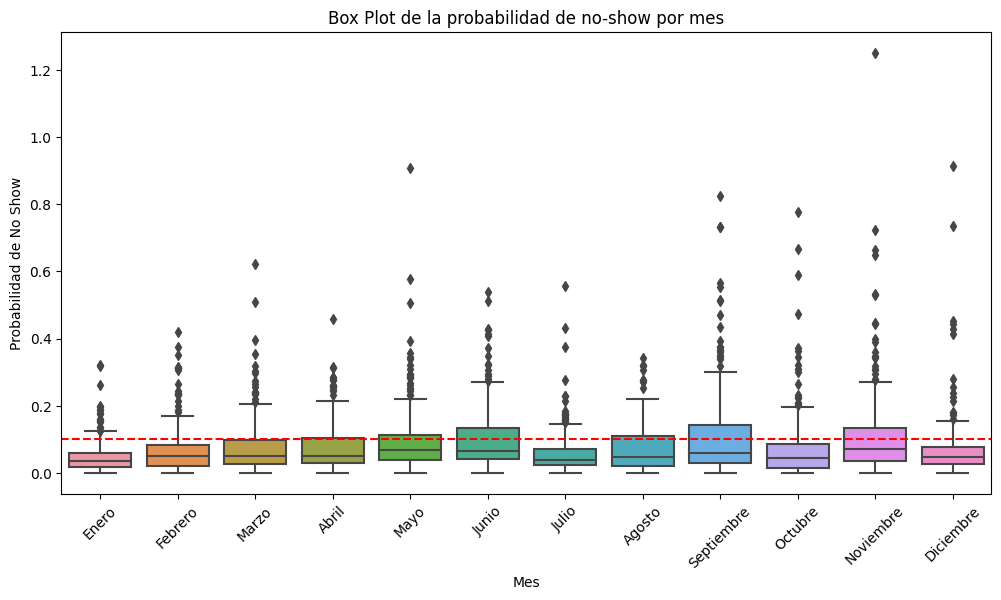

In [ ]:
# Orden de los meses para el boxplot
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear el boxplot para el mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='nombre_mes', y='ns_pp', data=ns_df, order=orden_meses)

# Dibujar una línea punteada roja en y=0.1
plt.axhline(y=0.1, color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Probabilidad de No Show')
plt.title('Box Plot de la probabilidad de no-show por mes')

# Ajustar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


En una primera observación se ve que los meses de Enero y Julio presentan menor probabilidad de no-show, en comparación con Junio y Mayo.

Para verificar los meses con menor probabilidad de no-show ordenamos la probabilidad por mes, en el siguiente cuadro.


In [ ]:
# Calcular el promedio de 'ns_pp' agrupado por mes
ns_pp_agregado_por_mes = ns_df.groupby('nombre_mes')['ns_pp'].mean().reset_index()

# Ordenar el DataFrame por el promedio de 'ns_pp' en orden descendiente
ns_pp_agregado_por_mes_ordenado_desc = ns_pp_agregado_por_mes.sort_values(by='ns_pp', ascending=False)

# Mostrar las primeras filas del DataFrame ordenado en orden descendiente
ns_pp_agregado_por_mes_ordenado_desc

,nombre_mes,ns_pp
9,Noviembre,0.113415
11,Septiembre,0.108500
6,Junio,0.101319
8,Mayo,0.094784
7,Marzo,0.081115
1,Agosto,0.076293
0,Abril,0.076125
4,Febrero,0.070998
10,Octubre,0.070781
2,Diciembre,0.067443


En el Cuadro 3 se puede comprobar que los meses de vacaciones presentan menor probabilidad de no-show, lo que confirma la hipótesis inicial.


### Parte c.-

Se construyen dos estrategias de submuestreo en relación con los análisis anteriores. La primera estrategia es más laxa e incluye distintas combinaciones (alcanza 124 observaciones). La segunda estrategia es más estricta y se ajusta casi a la misma condición de la compra indicada (alcanza 49 observaciones). La idea es tener dos parámetros de comparación para la siguiente pregunta.

#### Primera estrategia




In [ ]:
# Filtrar el DataFrame ns_df
m1_df = ns_df[(ns_df['dia_semana_nombre'].isin(['Lunes', 'Martes', 'Miércoles'])) &
              (ns_df['hora_despegue'].isin([12, 13])) &
              (ns_df['nombre_mes'].isin(['Noviembre', 'Septiembre', 'Junio'])) &
              (ns_df['asientos'] == 150)]



##### Creamos el histograma de la primera estrategia


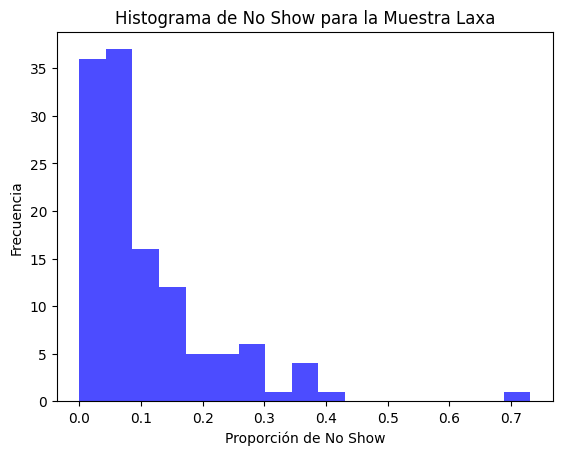

In [ ]:
# Crear un histograma para la columna 'ns_pp' del DataFrame filtrado 'm1_df'
plt.hist(m1_df['ns_pp'], bins='auto', color='blue', alpha=0.7)

# Etiquetas y título
plt.xlabel('Proporción de No Show')
plt.ylabel('Frecuencia')
plt.title('Histograma de No Show para la Muestra Laxa')

# Mostrar el gráfico
plt.show()


#### Segunda estrategia


In [ ]:
# Filtrar el DataFrame ns_df con la segunda estrategia
m2_df = ns_df[(ns_df['dia_semana_nombre'].isin(['Lunes', 'Miércoles'])) &
              (ns_df['hora_despegue'].isin([12, 13])) &
              (ns_df['nombre_mes'].isin(['Noviembre', 'Septiembre'])) &
              (ns_df['asientos'] == 150)]


##### Creamos el histograma de la segunda estrategia


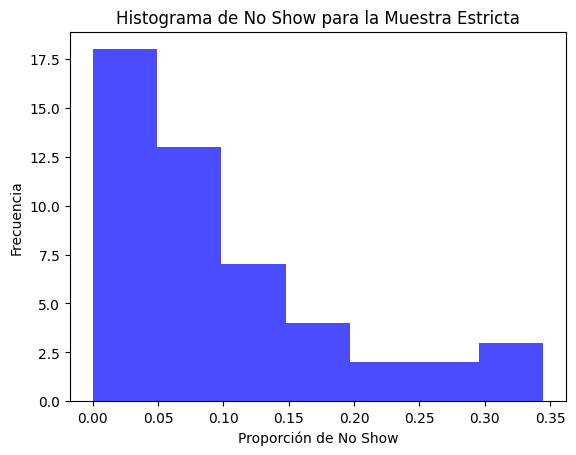

In [ ]:
# Crear un histograma para la columna 'ns_pp' del DataFrame filtrado 'm1_df'
plt.hist(m2_df['ns_pp'], bins='auto', color='blue', alpha=0.7)

# Etiquetas y título
plt.xlabel('Proporción de No Show')
plt.ylabel('Frecuencia')
plt.title('Histograma de No Show para la Muestra Estricta')

# Mostrar el gráfico
plt.show()


### Parte d.-

Con los datos indicados en el assignment calculamos la razón crítica



In [ ]:
critical_ratio = (450/(450+1100))

critical_ratio

0.2903225806451613


Luego, evaluamos para la primera estrategia usando la información de la distribución


In [ ]:
# Calcular la media y la desviación estándar de 'ns_pp' en m1_df
mean_ns_pp_1 = m1_df['ns_pp'].mean()
sd_ns_pp_1 = m1_df['ns_pp'].std()

# Calcular el valor usando la distribución normal
A_F_OPT_1 = norm.ppf(critical_ratio, mean_ns_pp_1, sd_ns_pp_1)

# Multiplicar por 150
q_opt_1 = 150 * A_F_OPT_1

q_opt_1

7.521997768921887


Luego, evaluamos para la segunda estrategia usando la información de la distribución


In [ ]:

# Calcular la media y la desviación estándar de 'ns_pp' en m1_df
mean_ns_pp_2 = m2_df['ns_pp'].mean()
sd_ns_pp_2 = m2_df['ns_pp'].std()

# Calcular el valor usando la distribución normal
A_F_OPT_2 = norm.ppf(critical_ratio, mean_ns_pp_2, sd_ns_pp_2)

# Multiplicar por 150
q_opt_2 = 150 * A_F_OPT_2

q_opt_2


7.228763262909278

In [ ]:
# Mostrar el mensaje con los resultados
print(f"De acuerdo a los resultados, el número óptimo de sobreventa está entre {q_opt_2:.0f} y {q_opt_1:.0f} asientos, "
      "de acuerdo al grado de flexibilidad que se quiera considerar.")

De acuerdo a los resultados, el número óptimo de sobreventa está entre 7 y 8 asientos, de acuerdo al grado de flexibilidad que se quiera considerar.



# Pregunta II

Para ambos modelos la variable dependiente será Accept, y el modelo tratará de predecir esta variable como una función lineal del APR y otras variables relevantes.

### Parte a.- Selección de Variables
Observamos el dataset considerando que es importante incluir variables que podrían influir en la decisión de aceptar un crédito. Las variables más relevantes parecen ser APR, FICO, Amount, y posiblemente Term, Competition APR, Prime, y Tier.


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datos/T1_Olivares_2023/e_Car_Data_extract_forClass_T1.xlsx')
data

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Tier,FICO,App_Date,Term,Amount,Pre_APR,Car_Type,Com_APR,Accept,APR,Prime,Partner_Bin
0,2,702,2002-07-02,60,22000.00,,U,5.85,0,6.19,1.8388,3
1,2,710,2002-07-03,60,21000.00,,U,5.85,0,6.19,1.8388,1
2,3,693,2002-07-06,60,19597.95,,U,5.85,1,7.29,1.8400,1
3,3,696,2002-07-06,60,23071.00,,U,5.85,0,7.29,1.8400,3
4,3,697,2002-07-08,60,21577.70,,U,5.80,1,7.29,1.8400,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1535,3,689,2004-11-14,60,21999.99,,U,4.85,0,8.49,2.1010,2
1536,2,702,2004-11-15,60,21000.00,,U,4.85,0,6.59,2.1100,1
1537,3,684,2004-11-15,60,25000.00,,U,4.85,0,8.49,2.1100,3
1538,2,700,2004-11-15,60,19999.99,,U,4.85,0,6.59,2.1100,1



* Tier: Una categoría o nivel.
* FICO: Puntuación de crédito FICO.
* App_Date: Fecha de la aplicación.
* Term: Duración del término en meses.
* Amount: Monto del préstamo o financiamiento.
* Car_Type: Tipo de automóvil (parece ser una categoría como nuevo, usado, etc.).
* Com_APR: Tasa Anual Efectiva Comercial.
* Accept: Indicador de si la aplicación fue aceptada o no (0 o 1).
* APR: Tasa Anual Efectiva.
* Prime: Tasa Prime asociada (posiblemente en el momento de la solicitud).
* Partner_Bin: Categoría del socio o colaborador.

En principio se decide hacer un chequeo de las variables e incluir todas las variables, identificando primero, si tienen colinealidad, luego el resultado de los modelos de regresión, y por último, usaremos regularización.

En todos los casos, el proposito es dejar que los datos nos muestren una ruta de las variables que podrían estar explicando la probabilidad de aceptar, mas que incluir argumentos a priori.

### Limpieza de las variables y revisión de colinealidad



In [ ]:
import statsmodels.api as sm
import numpy as np

# Preparación de los datos
# Eliminamos las filas con valores faltantes o no numéricos en las columnas relevantes
data_clean = data.dropna(subset=['Accept','APR','Tier','FICO','Term','Amount','Com_APR', 'Prime', 'Partner_Bin'])

from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Tratamiento de Variables Categóricas: Transformar 'Car_Type' y 'Partner_Bin' en variables dummy
# Convertir variables categóricas en variables dummy
X = pd.get_dummies(data_clean[['APR', 'Tier', 'FICO', 'Term', 'Amount','Com_APR', 'Car_Type', 'Prime', 'Partner_Bin']],
                             columns=['Car_Type', 'Partner_Bin'], drop_first=True)

# Revisar si hay valores infinitos o NaN en las variables independientes
if not np.all(np.isfinite(X)):
    # Reemplazar infinitos por NaN y luego rellenar NaNs con la media de cada columna
    X = X.replace([np.inf, -np.inf], np.nan).fillna(X.mean())


# Convertir todas las columnas a float para asegurar la compatibilidad de tipos de datos
X_float = X.astype(float)

# Recalcular el VIF con todas las columnas convertidas a float
vif_data = pd.DataFrame()
vif_data["feature"] = X_float.columns
vif_data["VIF"] = [variance_inflation_factor(X_float.values, i) for i in range(len(X_float.columns))]

# Revisar los resultados
vif_data

,feature,VIF
0,APR,1.847675
1,Tier,2.088815
2,FICO,1.723038
3,Term,13080.208677
4,Amount,1.030380
5,Com_APR,1.243219
6,Prime,1.531197
7,Partner_Bin_2,1.257212
8,Partner_Bin_3,1.179181



VIF ( Factor de inflación de varianza) es una medida simple que se usa para ver multicolinealidad entre las variables independientes.
* Cercano uno sugiere que no se observa
* Entre 1 y 5 sugiere colinealidad moderada
* Mayor que 5 sugiere colinealidad alta

De lo anterior se decide descartar la variable Term.

 ### Implementación del modelo lineal con las variables seleccionadas


In [ ]:
# Modelo Lineal
# Eliminar la variable 'Term' debido a su alta multicolinealidad
X_vif_adjusted = X_float.drop('Term', axis=1)

# Añadir una constante al conjunto de datos para el término de intercepción
X_vif_adjusted_const = sm.add_constant(X_vif_adjusted)
y = data['Accept']

# Ajustar el modelo de regresión lineal
modelo_lineal = sm.OLS(y, X_vif_adjusted_const).fit()

# Resumen del modelo
print(modelo_lineal.summary())

                            OLS Regression Results                            
Dep. Variable:                 Accept   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     84.35
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          8.60e-116
Time:                        03:54:31   Log-Likelihood:                -767.17
No. Observations:                1540   AIC:                             1552.
Df Residuals:                    1531   BIC:                             1600.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8267      1.164      3.288


Observamos que el Modelo Lineal (OLS) alcanza un R-squared: 0.306, indicando que el modelo explica aproximadamente el 30.6% de la variabilidad en la aceptación del crédito.

Al observar los Coeficientes vemos que:

APR: Un aumento en el APR está asociado con una disminución en la probabilidad de aceptación.

Tier: Categorías de riesgo más altas aumentan la probabilidad de aceptación.

FICO: La puntuación FICO tiene un pequeño efecto negativo, aunque no es estadísticamente significativo (p=0.065).

Amount: Un mayor monto del crédito reduce la probabilidad de aceptación.

Com_APR: la tasa comercial no es significativa en el modelo, con p-value > 0.32

Prime: No tiene un efecto significativo.

Partner_Bin_base 1: un aumento de Partner_Bin 2, con base a Parter Bin_1, presenta una mayor probabilidad de no aceptar el crédito, en comparación con Partner_Bin_3, usando la misma base




In [ ]:
# Modelo Logit
modelo_logit = sm.Logit(y, X_vif_adjusted_const).fit()

# Resumen del modelo
print(modelo_logit.summary())


Optimization terminated successfully.
         Current function value: 0.467698
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Accept   No. Observations:                 1540
Model:                          Logit   Df Residuals:                     1531
Method:                           MLE   Df Model:                            8
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                  0.2798
Time:                        03:54:37   Log-Likelihood:                -720.26
converged:                       True   LL-Null:                       -1000.1
Covariance Type:            nonrobust   LLR p-value:                1.048e-115
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.2921      7.139      2.142      0.032       1.299      29.285
APR              -1.


En el modelo logit tiene un desempeño menor que el modelo líneal, en relación con R2.

Observando las variables, se hacen no significativas las variables FICO, Com_APR, Prime. El resto de las variables estaría indicando un signo similar con relación a la probabilidad de aceptar.

### Regularización

Para poder seleccionar aquellas variables que mejor se ajustan para la predicción de la probabilidad de aceptar, usamos la regularización Lasso.


In [ ]:
from sklearn.linear_model import Lasso

# Crea una instancia del modelo Lasso con un valor de alpha mayor
modelo_lasso = Lasso(alpha=0.1)  # Puedes ajustar el valor de alpha aquí

# Ajusta el modelo Lasso a tus datos
modelo_lasso.fit(X_vif_adjusted_const, y)  # Reemplaza 'X' e 'y' con tus datos de entrenamiento

# Crear una lista de nombres de características que corresponden a los coeficientes
feature_names = list(X_vif_adjusted_const.columns)  # Reemplaza 'X' con tus datos de características
# Obtiene los coeficientes del modelo Lasso
coefs_lasso = modelo_lasso.coef_

# Crea una tabla de resultados utilizando pandas
result_table = pd.DataFrame({'Variable': feature_names, 'Coefficient': coefs_lasso})

# Muestra la tabla de resultados
print(result_table)

        Variable  Coefficient
0          const     0.000000
1            APR    -0.115715
2           Tier     0.000000
3           FICO    -0.002232
4         Amount    -0.000035
5        Com_APR     0.000000
6          Prime    -0.000000
7  Partner_Bin_2    -0.000000
8  Partner_Bin_3     0.000000



Usando un alpha de 0.1, es decir, de una regularización leve, tenemos que las mejores variables para predecir la probabilidad de aceptar es APR, FICO y Amount.



El desempeño de la regresión Lasso es inferior que las anteriores, pero nos indica cuales son las variables más indicadas para predecir la probabilidad de aceptar dado una regularización de 0.1.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Realiza predicciones utilizando el modelo
y_pred = modelo_lasso.predict(X_vif_adjusted_const)  # X es la misma matriz de datos utilizada para el ajuste

# Calcula el valor de R^2
r2 = r2_score(y, y_pred)

# Calcula el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y, y_pred)

# Calcula la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)

# Muestra los resultados
print(f"R^2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R^2 Score: 0.23488021342853138
Mean Squared Error (MSE): 0.1748019325515683
Root Mean Squared Error (RMSE): 0.4180932103629145



### Parte b.- Utilidad Óptima

Utilizando alguno de los modelos estimados, calcule la tasa óptima (APR) a ofrecer a un
cliente con FICO 700, para un monto de $22000 y un costo de fondo del crédito de CF=5.8.
Para realizar el este análisis, considere que la utilidad que genera el crédito está dada por:

𝑈𝑡𝑖𝑙𝑖𝑑𝑎𝑑 = 𝑀𝑜𝑛𝑡𝑜 × (𝑅 − 𝐶𝐹) × 𝐺(𝑅)




In [ ]:
# Calculando el valor promedio de APR de los datos
APR_promedio = X_vif_adjusted['APR'].mean()

# Asegurándonos de que el conjunto de datos del cliente tenga exactamente las mismas características que el modelo
data_cliente = pd.DataFrame(columns=X_vif_adjusted_const.columns)

# Estableciendo los valores para el cliente específico y usando valores predeterminados para las demás características
for col in data_cliente.columns:
    if col == 'FICO':
        data_cliente.at[0, col] = 700
    elif col == 'Amount':
        data_cliente.at[0, col] = 22000
    elif col == 'const':
        data_cliente.at[0, col] = 1
    else:
        data_cliente.at[0, col] = 0 if 'Car_Type' in col or 'Partner_Bin' in col else X_vif_adjusted[col].mean()

# Actualizando el conjunto de datos del cliente con el valor promedio de APR
data_cliente.at[0, 'APR'] = APR_promedio

# Realizar la predicción para el cliente específico
prediccion_cliente = modelo_lasso.predict(data_cliente)

# La predicción representa la probabilidad G(R) de que el cliente acepte el crédito
G_R = prediccion_cliente[0]
G_R, APR_promedio

(0.33980740200260273, 6.449357142857142)

In [ ]:
# Definiendo los parámetros
monto = 22000
CF = 5.8
G_R = 0.34

# Estableciendo un rango razonable para la tasa APR (R)
tasas_APR = np.linspace(4, 13, 1000)  # Rango de APR del 4% al 13% en 1.000 pasos

# Calculando la utilidad para cada tasa APR en el nuevo rango
utilidades_ajustadas = []
for R in tasas_APR:
    data_cliente.at[0, 'APR'] = R
    G_R_ajustado = modelo_lasso.predict(data_cliente)[0]
    utilidad = monto * (R - CF) * G_R_ajustado
    utilidades_ajustadas.append(utilidad)

# Encontrando la tasa APR que maximiza la utilidad
indice_max_utilidad_ajustado = np.argmax(utilidades_ajustadas)
APR_optimo_ajustado = tasas_APR[indice_max_utilidad_ajustado]

resultados = f"La tasa APR óptima es {APR_optimo_ajustado:.2f}%, lo que alcanza una utilidad de {utilidades_ajustadas[indice_max_utilidad_ajustado]:.2f} unidades monetarias, " \
             f"dado el modelo Lasso que utiliza las variables APR, FICO y Amount, para los parámetros indicados en la pregunta."

resultados

'La tasa APR óptima es 7.59%, lo que alcanza una utilidad de 8183.87 unidades monetarias, dado el modelo Lasso que utiliza las variables APR, FICO y Amount, para los parámetros indicados en la pregunta.'

## Pregunta III -  Cruceros

## Parte 1

### Parte a.- Estimar la demanda


In [ ]:
# Se trae la data de los Cruceros
df_cr = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datos/T1_Olivares_2023/data_crucero.xlsx')

# Se importan Librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Calculando la fracción de clientes que tiene una valoración igual o menor a P para distintos valores de P
precios_unicos = sorted(df_cr['Precio'].unique())

#Calculando la probabilidad de compra (cantidad demandada) para cada precio P
probabilidad_compra = [np.mean(df_cr['Precio'] > P) for P in precios_unicos]

# Crear un DataFrame para la curva de demanda
df_demanda = pd.DataFrame({
    'Precio (en miles)': np.array(precios_unicos) / 1000,  # Convertir precios a miles
    'Probabilidad de Compra': probabilidad_compra
})

# Crear el gráfico con Plotly Express
fig = px.line(df_demanda, x='Precio (en miles)', y='Probabilidad de Compra',
              title='Curva de Demanda de Paquetes de Crucero',
              markers=True)

# Ajustar los intervalos en el eje X para mostrar cada 500 unidades
fig.update_xaxes(dtick=500)

# Configurar el fondo oscuro
fig.update_layout(template="plotly_dark")

fig.show()


#### Parte b.- El precio


In [ ]:
# Para calcular el precio óptimo que maximiza el ingreso esperado
# Ingreso esperado = Precio * Probabilidad de Compra

# Calculando el ingreso esperado para cada precio
ingresos_esperados = [P * probabilidad for P, probabilidad in zip(precios_unicos, probabilidad_compra)]

# Encontrando el precio que maximiza el ingreso esperado
indice_max_ingreso = np.argmax(ingresos_esperados)
precio_optimo = precios_unicos[indice_max_ingreso]
ingreso_optimo = ingresos_esperados[indice_max_ingreso]

# Ajustando el formato de los números para mostrarlos como $, separados por puntos
def formato_moneda(valor):
    """ Formatea un valor numérico a formato de moneda con separadores de miles y símbolo de dólar. """
    return "${:,.2f}".format(valor)

resultado = (f"El precio óptimo que maximiza el ingreso cuando existe un número ilimitados de paquetes para vender es de {formato_moneda(precio_optimo)}.")

resultado

'El precio óptimo que maximiza el ingreso cuando existe un número ilimitados de paquetes para vender es de $699,990.00.'


#### Parte c.-

Distribuir los Paquetes a lo Largo de los Días: Idealmente, queremos distribuir los 30 paquetes de manera uniforme a lo largo de los 5 días, lo que significa vender aproximadamente 6 paquetes por día.

Determinar el Porcentaje de Clientes a Satisfacer Cada Día: Dado que esperamos 15 clientes por día, vender 6 paquetes diarios implica satisfacer al 40% de los clientes (6/15 = 0.40).

Utilizar la Curva de Demanda para Encontrar el Precio Óptimo: Para encontrar el precio en el cual aproximadamente el 40% de los clientes están dispuestos a comprar el paquete. Este sería tu precio objetivo para el primer día.


In [ ]:
# Calculando el precio en el cual aproximadamente el 40% de los clientes están dispuestos a comprar el paquete
porcentaje_objetivo_clientes = 0.40  # 40%

# Buscando el precio más cercano a la probabilidad de compra objetivo (40%)
indice_cercano_40 = (np.abs(np.array(probabilidad_compra) - porcentaje_objetivo_clientes)).argmin()
precio_optimo_40 = precios_unicos[indice_cercano_40]
probabilidad_cercana_40 = probabilidad_compra[indice_cercano_40]

respuesta = f"El precio óptimo para el primer día, con el objetivo de vender aproximadamente 6 de los 30 paquetes " \
                   f"(satisfaciendo al 40% de los 15 clientes esperados), es de {formato_moneda(precio_optimo_40)} unidades monetarias. " \
                   f"A este precio, alrededor del {probabilidad_cercana_40:.2%} de los clientes estarían dispuestos a comprar el paquete."

respuesta

'El precio óptimo para el primer día, con el objetivo de vender aproximadamente 6 de los 30 paquetes (satisfaciendo al 40% de los 15 clientes esperados), es de $800,000.00 unidades monetarias. A este precio, alrededor del 36.45% de los clientes estarían dispuestos a comprar el paquete.'


#### Parte d.-

Considerar la Cantidad de Paquetes Restantes: 10 paquetes para vender.

Estimar la Demanda del Último Día: Si la demanda ha sido en promedio de 15 clientes por día, podríamos esperar una cantidad similar de clientes el último día.

Buscar el Precio que Maximice los Ingresos para los 10 Paquetes: Necesitas encontrar el precio más alto que te permita vender los 10 paquetes restantes, basandonos en la proporción de clientes dispuestos a pagar cada precio.

In [ ]:
# Buscando el precio correspondiente a una probabilidad de compra del 66%
probabilidad_objetivo_66 = 0.66

# Encontrando el precio más cercano a la probabilidad de compra del 66%
indice_cercano_66 = (np.abs(np.array(probabilidad_compra) - probabilidad_objetivo_66)).argmin()
precio_cercano_66 = precios_unicos[indice_cercano_66]
probabilidad_cercana_66 = probabilidad_compra[indice_cercano_66]

respuesta_python_ajustada = f"Si al quinto día nos quedan 10 paquetes, que son un 66% de la demanda promedio diaria, y tenemos que apuntar a satisfacer toda la demanda, " \
                            f" debemos vender los paquetes a un precio no menor a {formato_moneda(precio_cercano_66)}, para maximizar el ingreso esperado." \
                            f" que representa un probabilidad de compra de {probabilidad_cercana_66:.2%}, muy cercano al promedio diario. "

respuesta_python_ajustada

'Si al quinto día nos quedan 10 paquetes, que son un 66% de la demanda promedio diaria, y tenemos que apuntar a satisfacer toda la demanda,  debemos vender los paquetes a un precio no menor a $525,000.00, para maximizar el ingreso esperado. que representa un probabilidad de compra de 66.56%, muy cercano al promedio diario. '



## Parte 2 .-
Considere ahora la ultima versión del juego que hicimos en clase, en donde cuenta con 40 piezas para vender durante 5 días. Los primeros 4 días llegan clientes de baja valoración y el ultimo día clientes con alta valoración.

#### Parte a.-
El precio en los primeros 4 días se fija en 500.000 y el ultimo día a una tarifa alta de 1.300.000.


In [ ]:
critical_ratio = ((1300000-500000)/1300000)
critical_ratio

0.6153846153846154


La Razón crítica es 0,615. Luego evaluamos la distribución de Poisson para calcular el óptimo de paquetes a proteger para maximizar el ingreso esperado en 15 días.

Finalmente, podemos concur que el número de paquetes que se necesita proteger para maximizar el ingreso está entre 12 y 13 paquetes.


De otra forma:



In [ ]:
# Para maximizar el ingreso esperado de los 5 días, necesitamos determinar cuántos paquetes proteger para el último día
# Considerando que los primeros 4 días el precio es más bajo y el último día es más alto

# Parámetros dados
precio_bajo = 500000  # Precio en los primeros 4 días
precio_alto = 1300000  # Precio en el último día
total_paquetes = 40

# La distribución de Poisson para el último día tiene una media de 12
media_poisson_ultimo_dia = 12

data_poisson = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datos/T1_Olivares_2023/distribucion Poisson.xlsx')

# Separando las dos distribuciones presentes en el archivo
distribucion_dias_bajos = data_poisson[['x', 'Pr(D=x)', 'Pr(D<=x)']].dropna()
distribucion_dia_alto = data_poisson[['x.1', 'Pr(D=x).1', 'Pr(D<=x).1']].dropna().rename(columns={'x.1': 'x', 'Pr(D=x).1': 'Pr(D=x)', 'Pr(D<=x).1': 'Pr(D<=x)'})

# Calculando los ingresos esperados si se venden todos los paquetes a la tarifa baja en los primeros 4 días
ingresos_totales_bajos = 40 * precio_bajo  # Vender los 40 paquetes a 500,000 cada uno

# Calculando los ingresos esperados para diferentes números de paquetes protegidos para el último día
ingresos_maximos = 0
paquetes_protegidos_optimos = 0

for paquetes_protegidos in range(0, 41):  # Probando todos los escenarios desde 0 hasta 40 paquetes protegidos
    paquetes_vendidos_dias_bajos = 40 - paquetes_protegidos

    # Ingresos de los primeros 4 días
    ingresos_dias_bajos = paquetes_vendidos_dias_bajos * precio_bajo

    # Ingresos del último día
    # Calculando la cantidad esperada de paquetes vendidos el último día
    paquetes_vendidos_ultimo_dia = sum([min(x, paquetes_protegidos) * prob for x, prob in zip(distribucion_dia_alto['x'], distribucion_dia_alto['Pr(D=x)'])])
    ingresos_ultimo_dia = paquetes_vendidos_ultimo_dia * precio_alto

    # Total de ingresos
    ingresos_totales = ingresos_dias_bajos + ingresos_ultimo_dia

    # Verificar si este escenario maximiza los ingresos
    if ingresos_totales > ingresos_maximos:
        ingresos_maximos = ingresos_totales
        paquetes_protegidos_optimos = paquetes_protegidos

respuesta_python_configuracion = f"Dada la configuración del problema, para maximizar el ingreso se deben proteger {paquetes_protegidos_optimos} paquetes el último día, " \
                                  f"lo que permite alcanzar un ingreso de {formato_moneda(ingresos_maximos)} unidades monetarias."

respuesta_python_configuracion

'Dada la configuración del problema, para maximizar el ingreso se deben proteger 13 paquetes el último día, lo que permite alcanzar un ingreso de $23,889,786.21 unidades monetarias.'

## Pregunta IV .- Tiempos de Espera

FestEvents es un organizador de conciertos que está evaluando la instalación de baños
portátiles en un lugar al aire libre donde se llevará a cabo un concierto. En particular, está
considerando un área del lugar que está lejos de los baños existentes. Supongamos que habrá
una sola fila para acceder a todos los baños portátiles en esta área y que solo una persona usa
un baño a la vez. FestEvents está preocupado de que si la fila es demasiado larga, las personas
encontrarán otras formas y lugares para responder a la llamada de la naturaleza.
FestEvents estima que habrá un promedio de 4 llegadas por minuto a los baños, y que estas
llegadas siguen un proceso de Poisson. El tiempo que una persona pasa usando el baño sigue
una distribución exponencial con media 3.12 minutos.

1. Supongamos que FestEvents instala 14 baños portátiles. En promedio, ¿qué fracción de los baños estará ocupada durante el evento?

In [2]:


# Parámetros del problema
llegadas_por_minuto = 4 # Cantidad de personas que llegan por minuto (1/a)
lambda_val = 0.25  # Tasa promedio de llegada (interarrival time)(a)
num_banos = 14  # Número de baños portátiles (m)
tiempo_promedio = 3.12  # Tiempo promedio de uso del baño en minutos (p)

#Ecuaciones
tasa_llegada_efectiva = (num_banos*lambda_val) #Capacidad
fraccion_ocupados = tiempo_promedio/tasa_llegada_efectiva

# Imprimir resultado
print(fraccion_ocupados)


0.8914285714285715


Respuesta: El 89,14% de los baños, estará ocupados durante el evento.

2. Si se instalan 14 baños: ¿Cual es el tiempo promedio de espera?

In [3]:
# Si se instalan 14 baño ¿Cuál es el tiempo promedio de espera?

import math
import numpy as np

# Parámetros del problema: Al distribuir Poisson, el coeficiente de variación es 1, para ambas variables

tasa_servicio= tiempo_promedio/num_banos #(p/m)
raiz = ((math.sqrt(2 * (num_banos + 1)) - 1))
factor_utilizacion = (fraccion_ocupados**(math.sqrt(2 * (num_banos + 1)) - 1))/(1-fraccion_ocupados)
CVa = 1
CVp = 1
factor_variabilidad = math.sqrt(((CVa**2)+(CVp**2))/2)


tiempo_promedio_espera = tasa_servicio*factor_utilizacion*factor_variabilidad


# Imprimir el resultado
print(tasa_servicio)
print(factor_utilizacion)
print (factor_variabilidad)
print (tiempo_promedio_espera)



0.22285714285714286
5.505676267201468
1.0
1.2269792824048986


Respuesta: El tiempo de espera en la fila será de 1,226 minutos

3. ¿Cuál es el número mínimo de baños portátiles que FestEvents debe instalar para
asegurarse de que la longitud de la fila no siga creciendo sin límite (es decir, para que la
fila sea estable)? La respuesta debe ser un número entero.

In [5]:
#Número Mínimo de Baños para Estabilidad
mu=1/tiempo_promedio
num_banos_minimos = math.ceil(llegadas_por_minuto / mu)
print(num_banos_minimos)

13


Respuesat: El número de baños minimo es 13

## Pregunta V .- Newsvendor

1. ¿Cuántos kilogramos deberían producir para maximizar las utilidades esperadas durante
la temporada?

In [ ]:
from scipy.stats import norm

# Parámetros del problema
costo_escasez_por_unidad = 37
costo_total_por_unidad = 8
ingreso_internacional = 3

# Cálculo del ratio crítico
ratio_critico = costo_escasez_por_unidad / (costo_escasez_por_unidad + costo_total_por_unidad- ingreso_internacional)

# Cálculo del valor crítico utilizando la distribución acumulativa normal inversa
valor_critico = norm.ppf(ratio_critico)

# Parámetros adicionales
demanda_media = 300000
desviacion_estandar_demanda = 106000

# Cálculo de la cantidad óptima
cantidad_optima = norm.ppf(ratio_critico, loc=demanda_media , scale=desviacion_estandar_demanda)
print(f"Ratio crítico: {ratio_critico}")
print(f"Valor crítico: {valor_critico}")
print(f"Cantidad óptima: {cantidad_optima:.2f} kg")

Ratio crítico: 0.8809523809523809
Valor crítico: 1.1797611176118612
Cantidad óptima: 425054.68 kg


2. ¿cuántos kilogramos deberían producirse si desean minimizar su inventario asegurando
que la probabilidad de quedarse sin stock no sea mayor al 10%? (esta pregunta no
requiere responder la pregunta 1 para ser analizada)

In [ ]:
from scipy.stats import norm

# Parámetros del problema
nivel_servicio_objetivo = 0.9  # 90%
demanda_media = 300000
desviacion_estandar_demanda = 106000

# Cálculo de la cantidad óptima para el nivel de servicio objetivo
cantidad_optima = norm.ppf(nivel_servicio_objetivo, loc=demanda_media, scale=desviacion_estandar_demanda)
print(f"Cantidad óptima para nivel de servicio objetivo del {nivel_servicio_objetivo * 100}%: {cantidad_optima:.2f} kg")


Cantidad óptima para nivel de servicio objetivo del 90.0%: 435844.47 kg


Para minimizar el inventario asegurando que la probabilidad de quedarse sin stock no sea mayor al 10%, Montanso debería producir aproximadamente 435,844 kg de semillas.

Este cálculo se basa en encontrar el percentil 90 de la distribución normal de la demanda. Es decir, produciendo 435,844 kg, hay un 90% de probabilidad de que la demanda sea igual o menor a esta cantidad, y solo un 10% de probabilidad de que la demanda exceda esta cantidad, lo que minimiza el riesgo de quedarse sin stock.

3. Un alto ejecutivo de la empresa hace la siguiente pregunta: "Supongamos que producimos 500,000 kilogramos ¿Cuál es la probabilidad de que nuestros ingresos totales sean al menos $18,000,000?"Tomar en cuenta que los ingresos provienen tanto de las ventas locales como de las ventas en el extranjero. Además, se pregunta por los ingresos y no las utilidades, por lo que se debe ignorar los costos.

In [ ]:
# Parámetros
costo_produccion = 8  # Costo de producción por kg
precio_venta_local = 45  # Precio de venta en el mercado local por kg
precio_venta_internacional = 3  # Precio de venta en el mercado internacional por kg
media_demanda = 300000  # Media de la demanda
desviacion_estandar_demanda = 106000  # Desviación estándar de la demanda
produccion = 500000  # Producción (kg)
ingreso_objetivo = 18000000  # Ingreso objetivo ($)

# Función para calcular ingresos basados en una demanda dada
def calcular_ingresos(demanda):
    ingresos_locales = min(demanda, produccion) * precio_venta_local
    ingresos_internacionales = max(produccion - demanda, 0) * precio_venta_internacional
    return ingresos_locales + ingresos_internacionales

# Encontrar la demanda mínima para la cual los ingresos alcanzan el objetivo
demanda_minima = 0
for demanda in range(produccion):
    if calcular_ingresos(demanda) >= ingreso_objetivo:
        demanda_minima = demanda
        break

# Calcular la probabilidad de que la demanda sea al menos la demanda mínima necesaria para alcanzar el ingreso objetivo
probabilidad = 1 - norm.cdf(demanda_minima, loc=media_demanda, scale=desviacion_estandar_demanda)

print("Demanda mínima necesaria: ", demanda_minima)
print("Probabilidad: ", probabilidad*100, "%")

Demanda mínima necesaria:  392858
Probabilidad:  19.050988831007952 %


Probabilidad de Alcanzar un Objetivo de Ingresos Elevado: Con una producción de 500,000 kg, la probabilidad de que Montanso alcance ingresos de al menos $18,000,000 es de aproximadamente 19.05%. Este resultado sugiere que, aunque existe una oportunidad significativa de alcanzar un alto nivel de ingresos, también hay una considerable incertidumbre asociada. La demanda en el mercado local y la capacidad de vender el exceso de producción en el mercado internacional juegan un papel crucial en alcanzar este objetivo de ingresos.